<a href="https://colab.research.google.com/github/Ashish1999Kumar/Deep-learning/blob/master/sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors


In [0]:
def sigmoid(x,w,b):
  return 1/(1+np.exp(-w*x-b))

In [144]:
sigmoid(0,1,1)

0.7310585786300049

In [0]:
X=np.linspace(-10,10,100)

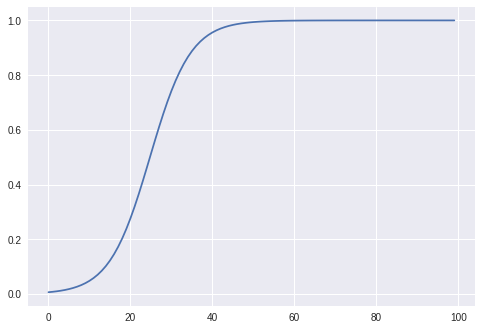

In [146]:
w=1 #@param {type: "slider", min: -10, max: 10}
b=5 #@param {type: "slider", min: -2, max: 5}
Y=sigmoid(X,w,b)

plt.plot(Y)
plt.show()

In [0]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [0]:
sigmoid_2d(0,0,0,1,1)
from mpl_toolkits import mplot3d

In [149]:
print(Y)

[0.00669285 0.00817894 0.00999169 0.01220126 0.01489212 0.01816549
 0.0221422  0.02696557 0.03280439 0.0398557  0.04834692 0.0585369
 0.07071501 0.0851974  0.1023192  0.12242144 0.14583148 0.17283646
 0.20364993 0.23837374 0.2769591  0.31917283 0.36457644 0.41252537
 0.46219351 0.51262358 0.56279795 0.61171941 0.65848849 0.70236512
 0.74280635 0.77947787 0.81224231 0.8411309  0.86630626 0.88802329
 0.906593   0.92235245 0.93564176 0.94678783 0.95609412 0.963835
 0.97025357 0.97556186 0.97994246 0.98355107 0.98651937 0.98895804
 0.99095959 0.99260104 0.99394628 0.99504815 0.99595028 0.99668861
 0.9972927  0.99778682 0.99819093 0.99852136 0.99879151 0.99901235
 0.99919286 0.99934041 0.999461   0.99955955 0.99964009 0.9997059
 0.99975969 0.99980364 0.99983955 0.9998689  0.99989288 0.99991247
 0.99992848 0.99994156 0.99995225 0.99996098 0.99996812 0.99997395
 0.99997872 0.99998261 0.99998579 0.99998839 0.99999051 0.99999225
 0.99999367 0.99999483 0.99999577 0.99999655 0.99999718 0.99999769

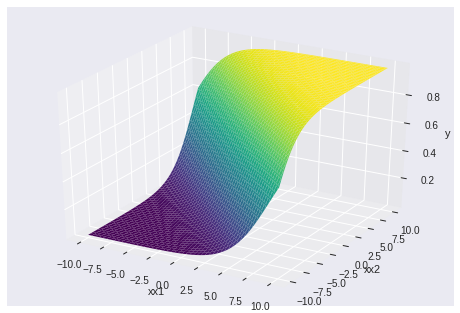

In [150]:
X1=np.linspace(-10,10,100)
X2=np.linspace(-10,10,100)
w1=0.5
w2=0.5
b=0.5
XX1, XX2 = np.meshgrid(X1,X2)
Y=sigmoid_2d(XX1,XX2,w1,w2,b)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('xx1')
ax.set_ylabel('xx2')
ax.set_zlabel('y');

In [0]:
mcap=matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

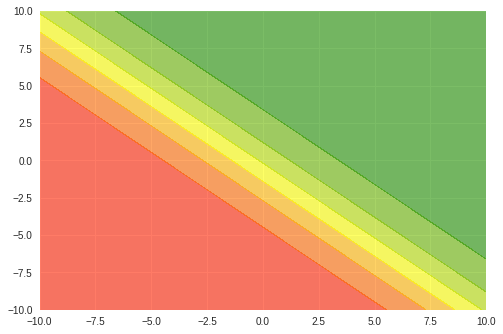

In [152]:
plt.contourf(XX1,XX2,Y,cmap=mcap,alpha=0.6)
plt.show()

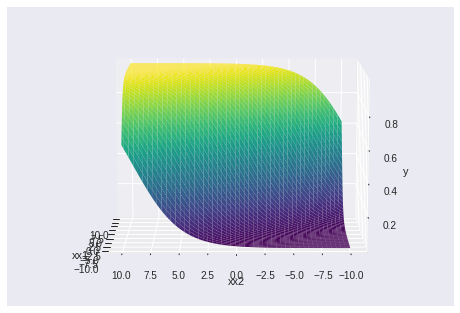

In [153]:
ax.view_init(10, 180)
fig

In [154]:
X=np.random.random(25)*20-10
Y=sigmoid(X,.5,.25)
X

array([ 5.73313943, -0.60401457,  8.33986473, -6.70370703, -7.39508306,
        3.66143356,  9.20364559, -8.88655497,  3.75626291, -9.87184275,
       -8.35216463, -0.0472418 ,  9.30568065, -2.34510604, -0.0949157 ,
        8.63051175, -2.60318009, -4.17454329,  0.38150805,  2.13966521,
       -4.49896089,  7.62575569,  5.52359482, -7.3604111 ,  9.27510071])

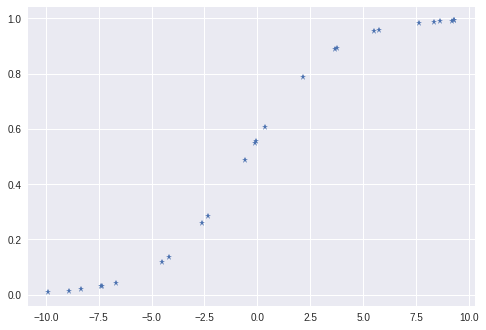

In [155]:
plt.plot(X,Y,'*')

In [0]:
W=np.linspace(-1,1,101)
B=np.linspace(-1,1,102)

ww,bb=np.meshgrid(W,B)

In [0]:
def loss(X,Y,w_est,b_est):
  loss=0
  for x,y in zip(X,Y):
    loss+=(y-sigmoid(x,w_est,b_est))**2
  return loss

In [0]:
Loss=np.zeros(ww.shape)

In [0]:
for i in range(ww.shape[0]):
  for j in range(ww.shape[1]):
    Loss[i,j]=loss(X,Y,ww[i,j],bb[i,j])

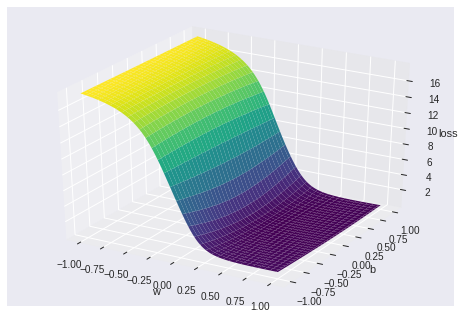

In [160]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(ww, bb, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss');

In [0]:
ij=np.argmin(Loss)
i=int(np.floor(ij/Loss.shape[1]))
j=int(ij-i*Loss.shape[1])

In [162]:
print(i,j)

63 75


In [163]:
print(ww[i,j],bb[i,j])

0.5 0.24752475247524752


In [164]:
print(Loss.shape)

(102, 101)


In [0]:
class sigmoid_neuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
    
    for i in range(epochs):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db

In [0]:
sn=sigmoid_neuron()

In [0]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[i], X2[j]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap=mcap, alpha=0.6)
  ax.scatter(X[:,0], X[:,1],c=Y, cmap=mcap)
  ax.plot()

[[1.30922124 0.42436067]] [0.0060373]
[[1.36829467 0.06451796]] [0.06257961]
[[ 1.3397674  -0.28349415]] [0.02922273]
[[ 1.31320265 -0.54088706]] [-0.04047923]
[[ 1.4059812  -0.42223586]] [-0.091809]
[[ 1.42266319 -0.50370006]] [-0.1408733]
[[ 1.47048401 -0.48282581]] [-0.18242413]
[[ 1.49986319 -0.50603678]] [-0.22131015]
[[ 1.53267213 -0.51190656]] [-0.25659877]
[[ 1.56168264 -0.52225824]] [-0.28930619]
[[ 1.5893459  -0.53079497]] [-0.31959305]
[[ 1.61534044 -0.53906569]] [-0.34778165]
[[ 1.63992645 -0.54685515]] [-0.37410152]
[[ 1.66323475 -0.55424292]] [-0.39875613]
[[ 1.68538941 -0.561265  ]] [-0.42191904]
[[ 1.70649707 -0.56795523]] [-0.44373997]
[[ 1.72665063 -0.57434303]] [-0.46434868]
[[ 1.74593146 -0.5804542 ]] [-0.48385818]
[[ 1.76441117 -0.58631147]] [-0.50236735]
[[ 1.78215305 -0.59193493]] [-0.51996309]
[[ 1.79921331 -0.59734243]] [-0.53672211]
[[ 1.81564208 -0.60254991]] [-0.55271239]
[[ 1.8314842 -0.6075716]] [-0.56799438]
[[ 1.84677996 -0.61242033]] [-0.58262208]
[[ 1.

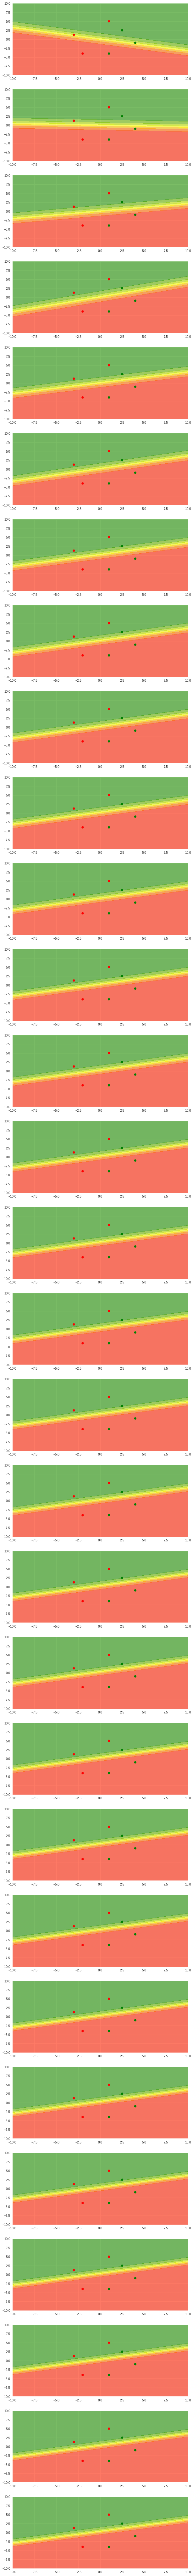

In [198]:
X=np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])

Y=np.asarray([1,1,1,0,0,0])
sn.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)

In [194]:
print(X2.shape)

(100,)
